In [397]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [398]:
ex1_class_train_df = pd.read_csv(r'C:\Users\user\git\CE-DataAnalytics\ex_1_classification\Ex1-Class-train.csv')
ex1_class_train_df.drop('id', axis=1, inplace=True)

In [399]:
# my pipeline include following step: 

# category features: process data with some encoder techniuqe

# numerical features: fill null value with mean of the same group of result(y)

# plot before normalize
# normalize numerical features
# plot after normalize

# detect and remove outlier
# plot after remove outlier

# predict using model --> MLP (Neural network), Decision Trees

# evaluation

# run with unseen data set

In [400]:
# category features: process data with some encoder techniuqe


'''
Choosing the Right Technique
The decision to use one-hot encoding or ordinal encoding depends on the nature of the categorical variable and the problem you are tackling. 
Here are some guidelines:

Use One-Hot Encoding: When dealing with nominal categorical variables that lack any inherent order.
Use Ordinal Encoding: When you have categorical variables with a clear ordinal relationship and the order between categories holds valuable information.
'''

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
target_encode_features = ['x3', 'x4', 'x5']

#Initialize Ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Apply ordinal encoding to the categorical columns
ordinal_encoded = encoder.fit_transform(ex1_class_train_df[target_encode_features])

#Create a DataFrame with the ordinal encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=encoder.get_feature_names_out(target_encode_features))

# concat ordinal encoded dataframe with original dataframe
ex1_class_train_df.drop(target_encode_features, axis='columns', inplace=True)
ex1_class_train_df = pd.concat([ex1_class_train_df, ordinal_encoded_df], axis='columns')

# fill Nan of x3, x4, x5 with 5
for cur_feature in target_encode_features:
    cur_fill_val = ex1_class_train_df[cur_feature].max() + 1
    ex1_class_train_df[cur_feature].fillna(cur_fill_val, inplace=True)

# remove row with NaN of result label(since there are not many number of 'y')
ex1_class_train_df.dropna(subset=['y'], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_49916\1665666481.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ex1_class_train_df[cur_feature].fillna(cur_fill_val, inplace=True)


In [401]:
# numerical features: fill missing values with the mean value of that feature calculated separately for each class label 'y'

target_num_features = ['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10']
for cur_num_feature in target_num_features:
    ex1_class_train_df[cur_num_feature] = ex1_class_train_df[cur_num_feature].fillna(ex1_class_train_df.groupby('y')[cur_num_feature].transform('mean'))

In [402]:
ex1_class_train_df

,x1,x2,x6,x7,x8,x9,x10,y,x3,x4,x5
0,22.34,0.56,9.43,25.380000,-20.91000,-25.84,4.08,B,2.0,3.0,0.0
1,-2.31,7.36,-3.94,-1.387544,31.65000,12.95,9.82,C,4.0,4.0,4.0
2,-17.55,-4.09,-11.02,-1.770000,-17.57000,15.98,11.43,D,1.0,0.0,1.0
3,-13.54,-5.42,4.11,2.220000,16.72000,9.86,16.43,A,2.0,4.0,3.0
4,13.39,-3.20,2.23,11.760000,1.34000,4.16,-6.49,B,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
485,12.54,3.16,-3.49,-16.430000,-3.70000,-4.12,-2.83,D,3.0,1.0,1.0
486,8.10,-2.49,-10.61,-1.630000,-8.81000,18.60,10.92,B,4.0,1.0,0.0
487,13.72,-10.59,-32.73,-3.940000,-0.99614,8.97,-8.30,C,4.0,1.0,4.0
488,-6.12,-6.37,22.34,-4.660000,-10.86000,-17.77,-0.21,C,0.0,1.0,0.0


<Axes: xlabel='variable', ylabel='value'>

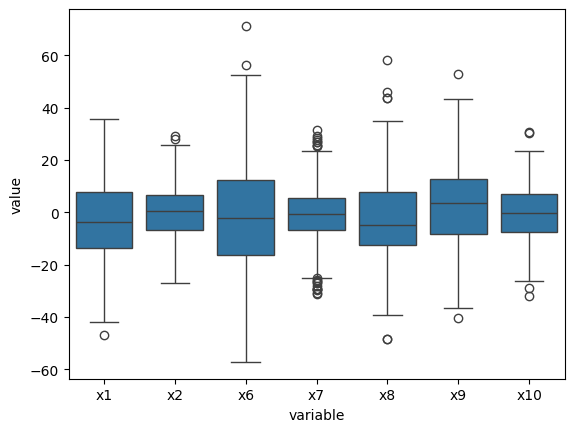

In [403]:
# plot before normalize

target_num_features = ['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10']

# Melt the DataFrame to long format
df_melted = ex1_class_train_df[target_num_features].melt()

# Create the grouped boxplot
sns.boxplot(x='variable', y='value', data=df_melted)

In [404]:
# normalize numerical features

# create a MinMaxScaler object
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(ex1_class_train_df.loc[:, target_num_features])
norm_ex1_class_train_df = pd.DataFrame(normalized_data, columns=target_num_features)
for cur_num_feature in target_num_features:
    ex1_class_train_df[cur_num_feature] = norm_ex1_class_train_df[cur_num_feature]

ex1_class_train_df

,x1,x2,x6,x7,x8,x9,x10,y,x3,x4,x5
0,0.838351,0.490795,0.519041,0.906220,0.258909,0.156842,0.57648,B,2.0,3.0,0.0
1,0.540322,0.612332,0.414921,0.477115,0.750538,0.571841,0.66832,C,4.0,4.0,4.0
2,0.356063,0.407685,0.359785,0.470984,0.290151,0.604258,0.69408,D,1.0,0.0,1.0
3,0.404546,0.383914,0.477611,0.534947,0.610888,0.538782,0.77408,A,2.0,4.0,3.0
4,0.730141,0.423592,0.462970,0.687881,0.467028,0.477800,0.40736,B,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3.0,1.0,1.0
486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,4.0,1.0,0.0
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,4.0,1.0,4.0
488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,0.0,1.0,0.0


In [405]:
ex1_class_train_df['x1'].isnull().any()

np.True_

In [406]:
ex1_class_train_df

,x1,x2,x6,x7,x8,x9,x10,y,x3,x4,x5
0,0.838351,0.490795,0.519041,0.906220,0.258909,0.156842,0.57648,B,2.0,3.0,0.0
1,0.540322,0.612332,0.414921,0.477115,0.750538,0.571841,0.66832,C,4.0,4.0,4.0
2,0.356063,0.407685,0.359785,0.470984,0.290151,0.604258,0.69408,D,1.0,0.0,1.0
3,0.404546,0.383914,0.477611,0.534947,0.610888,0.538782,0.77408,A,2.0,4.0,3.0
4,0.730141,0.423592,0.462970,0.687881,0.467028,0.477800,0.40736,B,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,3.0,1.0,1.0
486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,4.0,1.0,0.0
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,4.0,1.0,4.0
488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,0.0,1.0,0.0


<Axes: xlabel='variable', ylabel='value'>

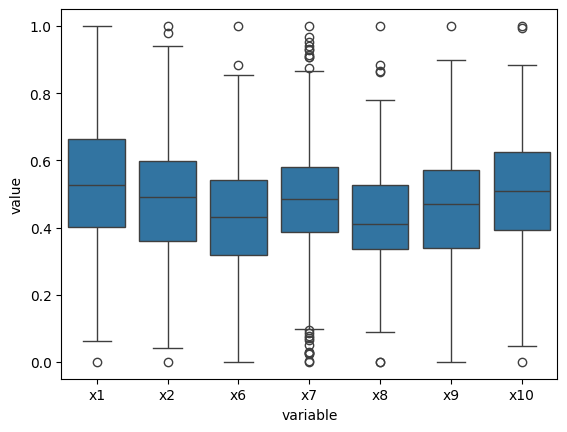

In [407]:
# plot after normalize

target_num_features = ['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10']

# Melt the DataFrame to long format
df_melted = ex1_class_train_df[target_num_features].melt()

# Create the grouped boxplot
sns.boxplot(x='variable', y='value', data=df_melted)

In [408]:


# detect and remove outlier
Q1 = ex1_class_train_df[target_num_features].quantile(0.25)
Q3 = ex1_class_train_df[target_num_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

boolMask_filter_outlier = pd.Series([True] * len(ex1_class_train_df))
for cur_num_feature in target_num_features:
    boolMask_filter_outlier = boolMask_filter_outlier & ((ex1_class_train_df[cur_num_feature] >= lower_bound[cur_num_feature]) & (ex1_class_train_df[cur_num_feature] <= upper_bound[cur_num_feature]))

ex1_class_train_df = ex1_class_train_df[boolMask_filter_outlier]
ex1_class_train_df 

# for cur_feature in target_num_features:
#     ex1_class_train_df[cur_feature] = ex1_class_train_df[cur_feature].clip(lower=lower_bound[cur_feature], upper=upper_bound[cur_feature])

# for cur_num_feature in target_num_features:
#     ex1_class_train_df[cur_num_feature] = ex1_class_train_df[cur_num_feature].fillna(ex1_class_train_df.groupby('y')[cur_num_feature].transform('mean'))

C:\Users\user\AppData\Local\Temp\ipykernel_49916\836509426.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ex1_class_train_df = ex1_class_train_df[boolMask_filter_outlier]


,x1,x2,x6,x7,x8,x9,x10,y,x3,x4,x5
1,0.540322,0.612332,0.414921,0.477115,0.750538,0.571841,0.66832,C,4.0,4.0,4.0
2,0.356063,0.407685,0.359785,0.470984,0.290151,0.604258,0.69408,D,1.0,0.0,1.0
3,0.404546,0.383914,0.477611,0.534947,0.610888,0.538782,0.77408,A,2.0,4.0,3.0
4,0.730141,0.423592,0.462970,0.687881,0.467028,0.477800,0.40736,B,4.0,0.0,1.0
5,0.575263,0.696872,0.339771,0.686438,0.341128,0.299668,0.38208,A,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
475,0.719865,0.537265,0.418425,0.235973,0.419886,0.389216,0.46592,C,3.0,0.0,4.0
476,0.666183,0.436282,0.362978,0.473229,0.372089,0.632288,0.68592,D,2.0,0.0,4.0
477,0.734131,0.291510,0.190717,0.436197,0.445177,0.529261,0.37840,B,4.0,3.0,0.0
478,0.494257,0.366935,0.619578,0.424655,0.352914,0.243180,0.50784,B,5.0,2.0,0.0


<Axes: xlabel='variable', ylabel='value'>

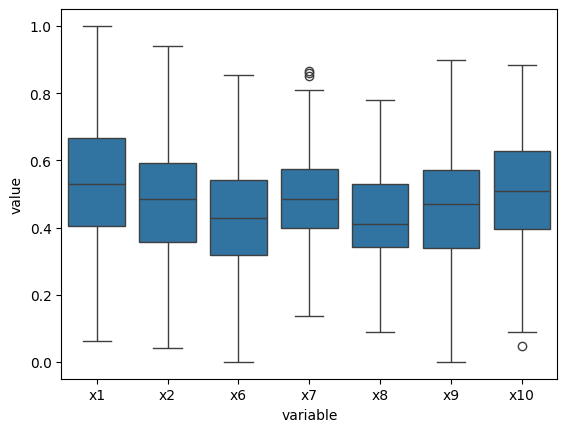

In [409]:
# plot after remove outlier

# Melt the DataFrame to long format
df_melted = ex1_class_train_df[target_num_features].melt()

# Create the grouped boxplot
sns.boxplot(x='variable', y='value', data=df_melted)

In [410]:
ex1_class_train_df.describe()

,x1,x2,x6,x7,x8,x9,x10,x3,x4,x5
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.534676,0.475023,0.431557,0.484803,0.433193,0.457883,0.508140,2.084862,2.064220,2.080275
std,0.177315,0.173943,0.156555,0.135705,0.135262,0.161809,0.158735,1.443065,1.448108,1.441735
min,0.061057,0.042717,0.000000,0.135941,0.088111,0.000000,0.047680,0.000000,0.000000,0.000000
25%,0.404425,0.356479,0.317499,0.397363,0.340614,0.339654,0.396320,1.000000,1.000000,1.000000
50%,0.530952,0.485791,0.427086,0.485893,0.410018,0.468921,0.508160,2.000000,2.000000,2.000000
75%,0.666576,0.591868,0.542442,0.574102,0.530189,0.571199,0.626280,3.000000,3.000000,3.000000
max,1.000000,0.940483,0.854762,0.865662,0.778973,0.897507,0.883520,5.000000,5.000000,5.000000


In [411]:
# predict using model --> MLP (Neural network), Decision Trees
X = ex1_class_train_df[target_num_features + target_encode_features]
Y = ex1_class_train_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, activation="tanh")
# model = DecisionTreeClassifier()



model = RandomForestClassifier(class_weight='balanced',random_state=60)

# model.fit(X, Y)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

# evaluation

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))

Accuracy: 0.8409090909090909


In [412]:
# evaluation

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8409090909090909
Classification Report:
              precision    recall  f1-score   support

           A       0.92      0.79      0.85        14
           B       0.92      0.85      0.88        13
           C       0.64      0.88      0.74         8
           D       0.89      0.89      0.89         9

    accuracy                           0.84        44
   macro avg       0.84      0.85      0.84        44
weighted avg       0.86      0.84      0.85        44



In [413]:
# run with unseen data set

unseen_df = pd.read_csv(r'C:\Users\user\git\CE-DataAnalytics\ex_1_classification\Ex1-Class-unseen.csv')
unseen_df.drop('id', axis=1, inplace=True)

# preprocess data for unseen

#Initialize Ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Apply ordinal encoding to the categorical columns
ordinal_encoded = encoder.fit_transform(unseen_df[target_encode_features])

#Create a DataFrame with the ordinal encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=encoder.get_feature_names_out(target_encode_features))

# concat ordinal encoded dataframe with original dataframe
unseen_df.drop(target_encode_features, axis='columns', inplace=True)
unseen_df = pd.concat([unseen_df, ordinal_encoded_df], axis='columns')

# fill Nan of x3, x4, x5 with 5
for cur_feature in target_encode_features:
    cur_fill_val = unseen_df[cur_feature].max() + 1
    unseen_df[cur_feature].fillna(cur_fill_val, inplace=True)

# create a MinMaxScaler object
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(unseen_df.loc[:, target_num_features])
norm_unseen_df = pd.DataFrame(normalized_data, columns=target_num_features)
for cur_num_feature in target_num_features:
    unseen_df[cur_num_feature] = norm_unseen_df[cur_num_feature]

# detect and remove outlier
# Q1 = unseen_df[target_num_features].quantile(0.25)
# Q3 = unseen_df[target_num_features].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# boolMask_filter_outlier = pd.Series([True] * len(unseen_df))
# for cur_num_feature in target_num_features:
#     boolMask_filter_outlier = boolMask_filter_outlier & ((unseen_df[cur_num_feature] >= lower_bound[cur_num_feature]) & (unseen_df[cur_num_feature] <= upper_bound[cur_num_feature]))

# unseen_df  = unseen_df[boolMask_filter_outlier]


C:\Users\user\AppData\Local\Temp\ipykernel_49916\387675019.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unseen_df[cur_feature].fillna(cur_fill_val, inplace=True)


In [414]:
unseen_df

,x1,x2,x6,x7,x8,x9,x10,x3,x4,x5
0,0.164669,0.039050,0.136171,0.796145,0.242788,0.503181,0.736687,0.0,0.0,2.0
1,0.122371,0.176392,0.305251,0.300469,0.277175,0.372614,0.314601,0.0,0.0,2.0
2,0.164669,0.179055,0.000000,0.653323,0.123240,0.499849,0.000000,0.0,4.0,2.0
3,0.503958,0.419791,0.915460,0.390413,1.000000,0.390185,0.706258,2.0,2.0,1.0
4,1.000000,1.000000,0.407781,0.480850,0.067621,0.542563,0.630920,3.0,1.0,0.0
5,0.154942,0.203461,0.852128,0.000000,0.543273,0.721145,1.000000,1.0,2.0,0.0
6,0.409862,0.153317,1.000000,0.679269,0.406416,0.000000,0.388466,0.0,0.0,0.0
7,0.237955,0.373863,0.839257,0.655794,0.000000,0.013026,0.486135,0.0,4.0,0.0
8,0.225741,0.122698,0.347667,1.000000,0.326102,0.232202,0.189448,0.0,0.0,2.0
9,0.000000,0.000000,0.407342,0.281443,0.212324,1.000000,0.481963,1.0,3.0,0.0


In [415]:

y_unseen_pred = model.predict(unseen_df)
y_unseen_pred

array(['A', 'A', 'A', 'B', 'B', 'D', 'C', 'C', 'A', 'D'], dtype=object)

In [416]:
for Idx, cur_y_pred in enumerate(y_unseen_pred):
    print("Q%s -> %s" % (Idx + 1, cur_y_pred))

Q1 -> A
Q2 -> A
Q3 -> A
Q4 -> B
Q5 -> B
Q6 -> D
Q7 -> C
Q8 -> C
Q9 -> A
Q10 -> D
